In [2]:
%load_ext autoreload
%autoreload 2
import fmuSimulation.gymFMUchecker as gymFMUChecker

import os
from fmuSimulation.configReader import configReader
import numpy as np
import sys

config = os.path.abspath('Example.cfg')
cfg = configReader(config)
config = cfg.getMulti(cfg.getSections())
config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


{'DEFAULT': {},
 'General': {'DEBUG': False, 'LOG': False, 'Href': 10},
 'FMU': {'fmuPath': '../../matlab/01-Watertank/rlwatertank.fmu',
  'startTime': 0,
  'stopTime': 200,
  'tolerance': 1e-06,
  'createFMU': False,
  'dt': 0.1},
 'Reinforcement Learning': {'actionInterval': 0.1},
 'Ray': {'num_workers': 2,
  'num_gpus': 0,
  'ignore_worker_failures': False,
  'recreate_failed_workers': False,
  'framework': 'torch'},
 'Environment': {},
 'Reward': {}}

In [3]:
env = gymFMUChecker.FMUchecker(config)

Incompatible sample time and stop time.
 Using 200.0 as stop time instead


In [4]:
env.fmu.getInput()

[ScalarVariable(name='Control.uctrl', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Control.ref', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [5]:
env.fmu.getOutput()

[ScalarVariable(name='Measurement.error', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[]),
 ScalarVariable(name='Measurement.errorIntegral', type='Real', clocks=[], dimensions=[], dimensionValueReferences=[])]

In [7]:
for i in range(1):
    done = False
    Kp = 1
    Ki = 2
    obs = env.reset()
    while not done:
        action = obs[0] * Kp + obs[1] * Ki
        #print(action)
        obs, reward, done, _ = env.step( [action])
        print(reward)

-47.1128042298767
-42.71098220163803
-38.27548638920744
-33.89057436748775
-29.62602148904867
-25.546304624755454
-21.709615929815662
-18.16701369800715
-14.9617476519863
-12.12876480109646
-9.694398042972214
-7.676235932926026
-6.083168495730386
-4.915600669347731
-4.165822001885939
-3.818518615131335
-3.8514112349847003
-4.2360012963949965
-4.938405774129295
-5.920260477973054
-7.139671079850796
-8.552191100510003
-10.111806456471498
-11.771906928290418
-13.48622602668832
-15.209732166133213
-16.89945576368021
-18.515238818492186
-20.02039564606896
-21.38227569099797
-22.572721672762196
-23.568418681157645
-24.351132183091334
-24.90783518528777
-25.23072697529692
-25.317147897659158
-25.169396479155687
-24.794456867756665
-24.2036459705274
-23.412190848299335
-22.438747836991592
-21.30487551041281
-20.034473976086026
-18.653203108393974
-17.18789218144227
-15.665952981431504
-14.114807873117332
-12.561343488846596
-11.031399726440615
-9.549302611021004
-8.137448324672343
-6.815944366

In [8]:
action = obs[0] * Kp + obs[1] * Ki
action


1.2649110644180739

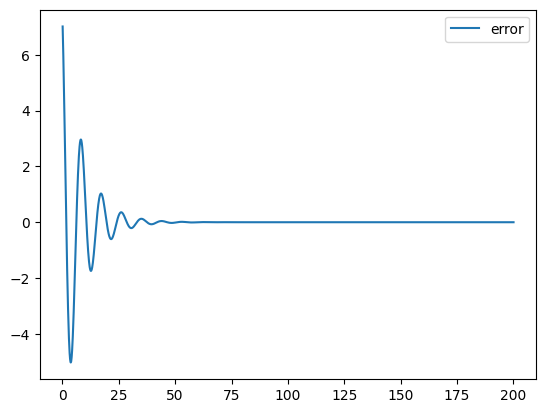

In [9]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times, env.outputs[:,0], label='error')
ax.legend()

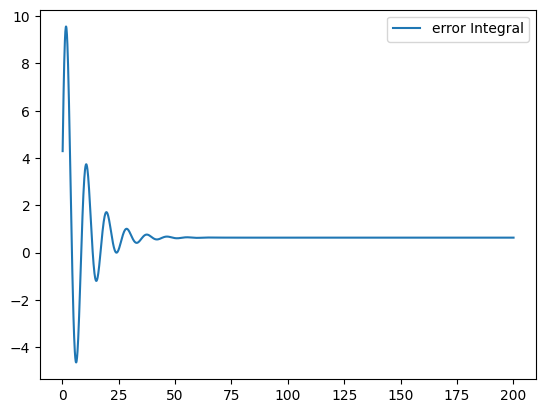

In [10]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[1:], env.outputs[1:,1], label='error Integral')
ax.legend()

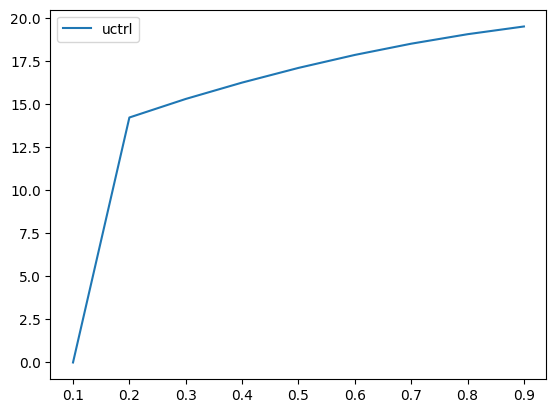

In [11]:
fig = plt.figure()
ax = fig.subplots()

ax.plot(env.times[:9], env.inputs[:9,0], label='uctrl')
ax.legend()

In [10]:
for i in range(100000):
    env.getReward(action,obs)

In [11]:
env.inputs

array([[ 0.00000000e+00,  1.00000000e+01],
       [ 3.67095180e+02,  1.00000000e+01],
       [ 3.96090227e+02,  1.00000000e+01],
       ...,
       [-3.43685170e+40,  1.00000000e+01],
       [-3.43685170e+40,  1.00000000e+01],
       [-3.43685170e+40,  1.00000000e+01]])

In [12]:
env.outputs

array([[  7.017298  ,   3.60077882],
       [ -1.2178169 ,   3.97308044],
       [-11.00826287,   3.41388727],
       ...,
       [         nan,          nan],
       [         nan,          nan],
       [         nan,          nan]])

In [13]:
env.times

array([[1.000e-01],
       [2.000e-01],
       [3.000e-01],
       ...,
       [1.999e+02],
       [2.000e+02],
       [2.001e+02]])

In [14]:
env.stepCount

2000